In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
input_col = "Input"
# use_input = False
# min_cell = 10

outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/sepDonors"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
use_input = False
min_cell = 10

In [2]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np

In [4]:
sns.set_context("paper", font_scale=2.5)

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}

se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAAGGAGACTC-1,Flt3l,531,531,2286,298,7,7,124,749,1101,...,1,649,621,NaN,Flt3l_AAACGAAAGGAGACTC-1,None,None,None,None,Neutrophil
Flt3l_AAACGAAAGTCACGCC-1,Flt3l,1222,1222,4711,555,16,12,289,853,2986,...,3,1674,1502,NaN,Flt3l_AAACGAAAGTCACGCC-1,None,None,None,None,Erythroid
Flt3l_AAACGAACAAGACTAA-1,Flt3l,2225,2225,9178,1509,37,19,585,1339,5689,...,1,3369,2695,NaN,Flt3l_AAACGAACAAGACTAA-1,None,None,None,None,Neutrophil
Flt3l_AAACGAACAAGCGAAC-1,Flt3l,2271,2271,8825,1544,24,24,535,1308,5390,...,5,3360,2784,NaN,Flt3l_AAACGAACAAGCGAAC-1,None,None,None,None,Granulocyte
Flt3l_AAACGAACACAGCCAC-1,Flt3l,2854,2854,10589,1294,41,31,456,2764,6003,...,9,3722,2998,NaN,Flt3l_AAACGAACACAGCCAC-1,None,None,None,None,Non-classical monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HPSC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HPSC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythroid


### Remove None before normalizing

In [6]:
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Flt3l_AAACGAAGTCTGATTG-1,Flt3l,4239,4239,15047,1940,50,52,636,4173,8196,...,6,5280,4119,AAACGAAGTCTGATTG-1_Flt3l,Flt3l_AAACGAAGTCTGATTG-1,2,0,Flt3l,0_2,HSPC 3
Flt3l_AAACTCGGTAGGTCTT-1,Flt3l,2925,2925,13052,1674,43,26,526,4014,6769,...,3,4538,3532,AAACTCGGTAGGTCTT-1_Flt3l,Flt3l_AAACTCGGTAGGTCTT-1,16,1,Flt3l,1_16,Erythroid
Flt3l_AAAGGGCAGACTTCCA-1,Flt3l,3562,3562,14297,2199,46,34,695,3497,7826,...,4,4653,3642,AAAGGGCAGACTTCCA-1_Flt3l,Flt3l_AAAGGGCAGACTTCCA-1,13,0,Flt3l,0_13,Classical Monocyte
Flt3l_AAATGAGGTATCCTTT-1,Flt3l,4915,4915,16671,2497,75,62,760,2906,10371,...,9,6459,4673,AAATGAGGTATCCTTT-1_Flt3l,Flt3l_AAATGAGGTATCCTTT-1,18,0,Flt3l,0_18,Non-classical monocyte
Flt3l_AAATGCCGTGATAAGT-1,Flt3l,3886,3886,15323,2276,44,49,723,3740,8491,...,4,5109,3980,AAATGCCGTGATAAGT-1_Flt3l,Flt3l_AAATGCCGTGATAAGT-1,6,0,Flt3l,0_6,Classical Monocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTGTTTCTTAC-1,Input,3580,3580,17067,3257,63,80,461,8097,5109,...,0,3738,2899,TTTGTGTGTTTCTTAC-1_Input,Input_TTTGTGTGTTTCTTAC-1,1,0,Input,0_1,HPSC 1
Input_TTTGTGTTCCTGAAAC-1,Input,4328,4328,30427,8323,84,99,799,12146,8976,...,7,5839,4144,TTTGTGTTCCTGAAAC-1_Input,Input_TTTGTGTTCCTGAAAC-1,27,0,Input,0_27,MkP
Input_TTTGTGTTCGGGAAAC-1,Input,8010,8010,40114,14032,169,160,1561,10102,14090,...,0,9421,5890,TTTGTGTTCGGGAAAC-1_Input,Input_TTTGTGTTCGGGAAAC-1,19,0,Input,0_19,HPSC 1
Input_TTTGTGTTCGGGACAA-1,Input,3286,3286,22721,4421,43,84,546,11692,5935,...,3,4303,3323,TTTGTGTTCGGGACAA-1_Input,Input_TTTGTGTTCGGGACAA-1,2,1,Input,1_2,Erythroid


## boxenplot and violin of clone sizes across cluster

In [7]:
hue_order

Index(['HPSC 1', 'Neutrophil', 'HPSC 2', 'Erythroid', 'Classical Monocyte',
       'Granulocyte', 'HSPC 3', 'MkP', 'HSPC 4', 'Non-classical monocyte',
       'pre-B cells', 'pDC'],
      dtype='object', name='nuclear_clusters')

In [8]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)

clone_counts

,name,nuclear_clusters,donor,ncells
0,0_0,Classical Monocyte,0,14
1,0_0,Erythroid,0,12
2,0_0,Granulocyte,0,14
3,0_0,HPSC 1,0,163
4,0_0,HPSC 2,0,108
...,...,...,...,...
587,1_9,MkP,1,11
588,1_9,Neutrophil,1,5
589,1_9,Non-classical monocyte,1,3
590,1_9,pDC,1,1


In [9]:
for don, val in clone_counts.groupby("donor"):
    val.pivot(index="name", columns="nuclear_clusters", values="ncells").fillna(0).to_csv(join(outdir, f"donor{don}.clone_clust.csv"))

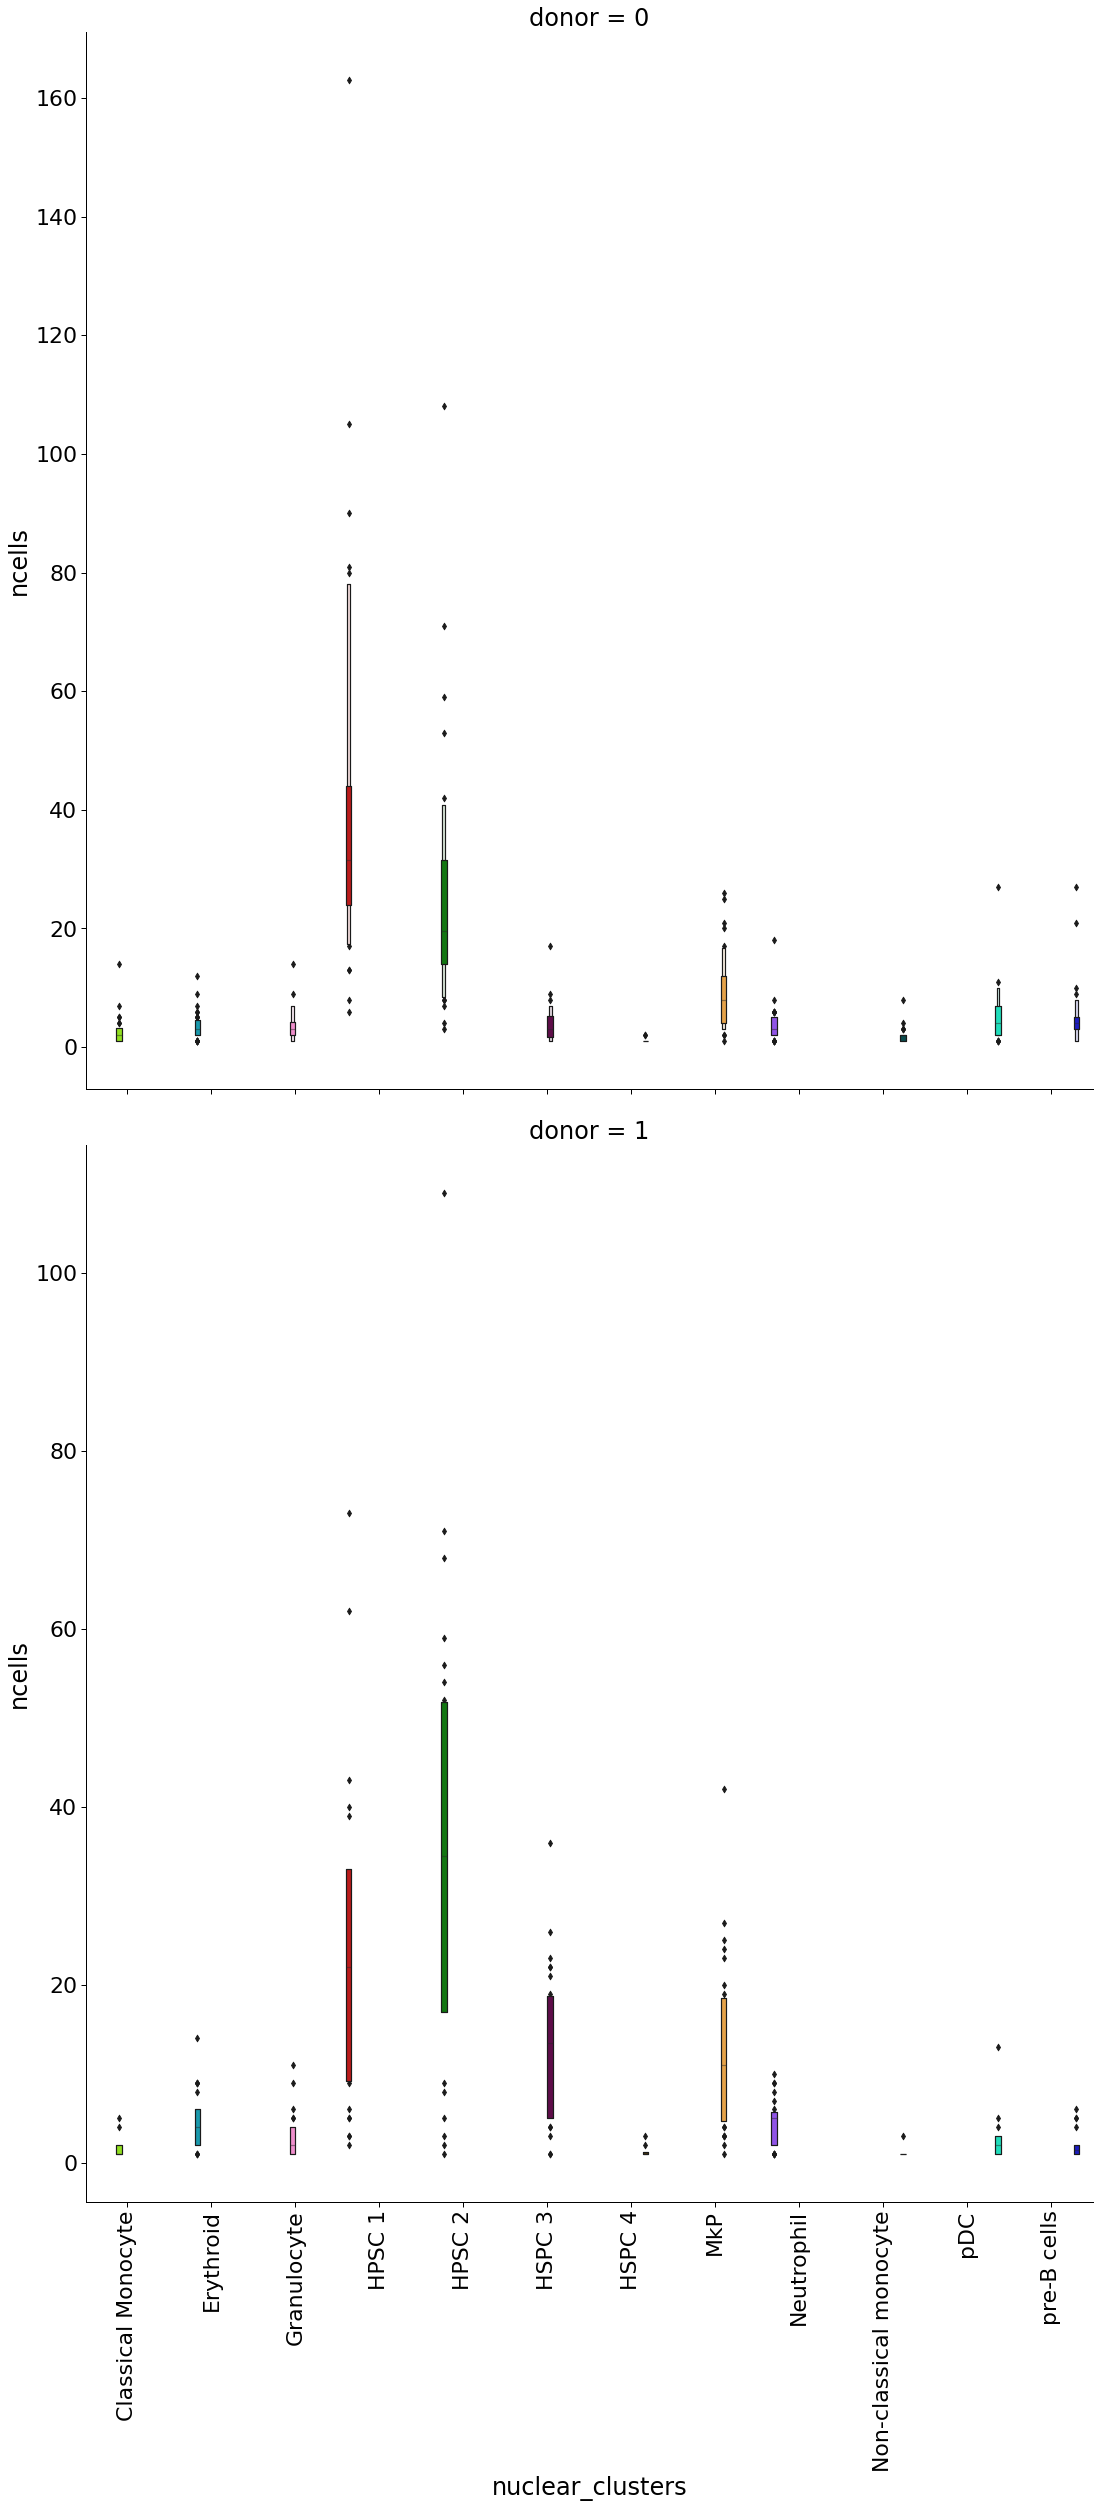

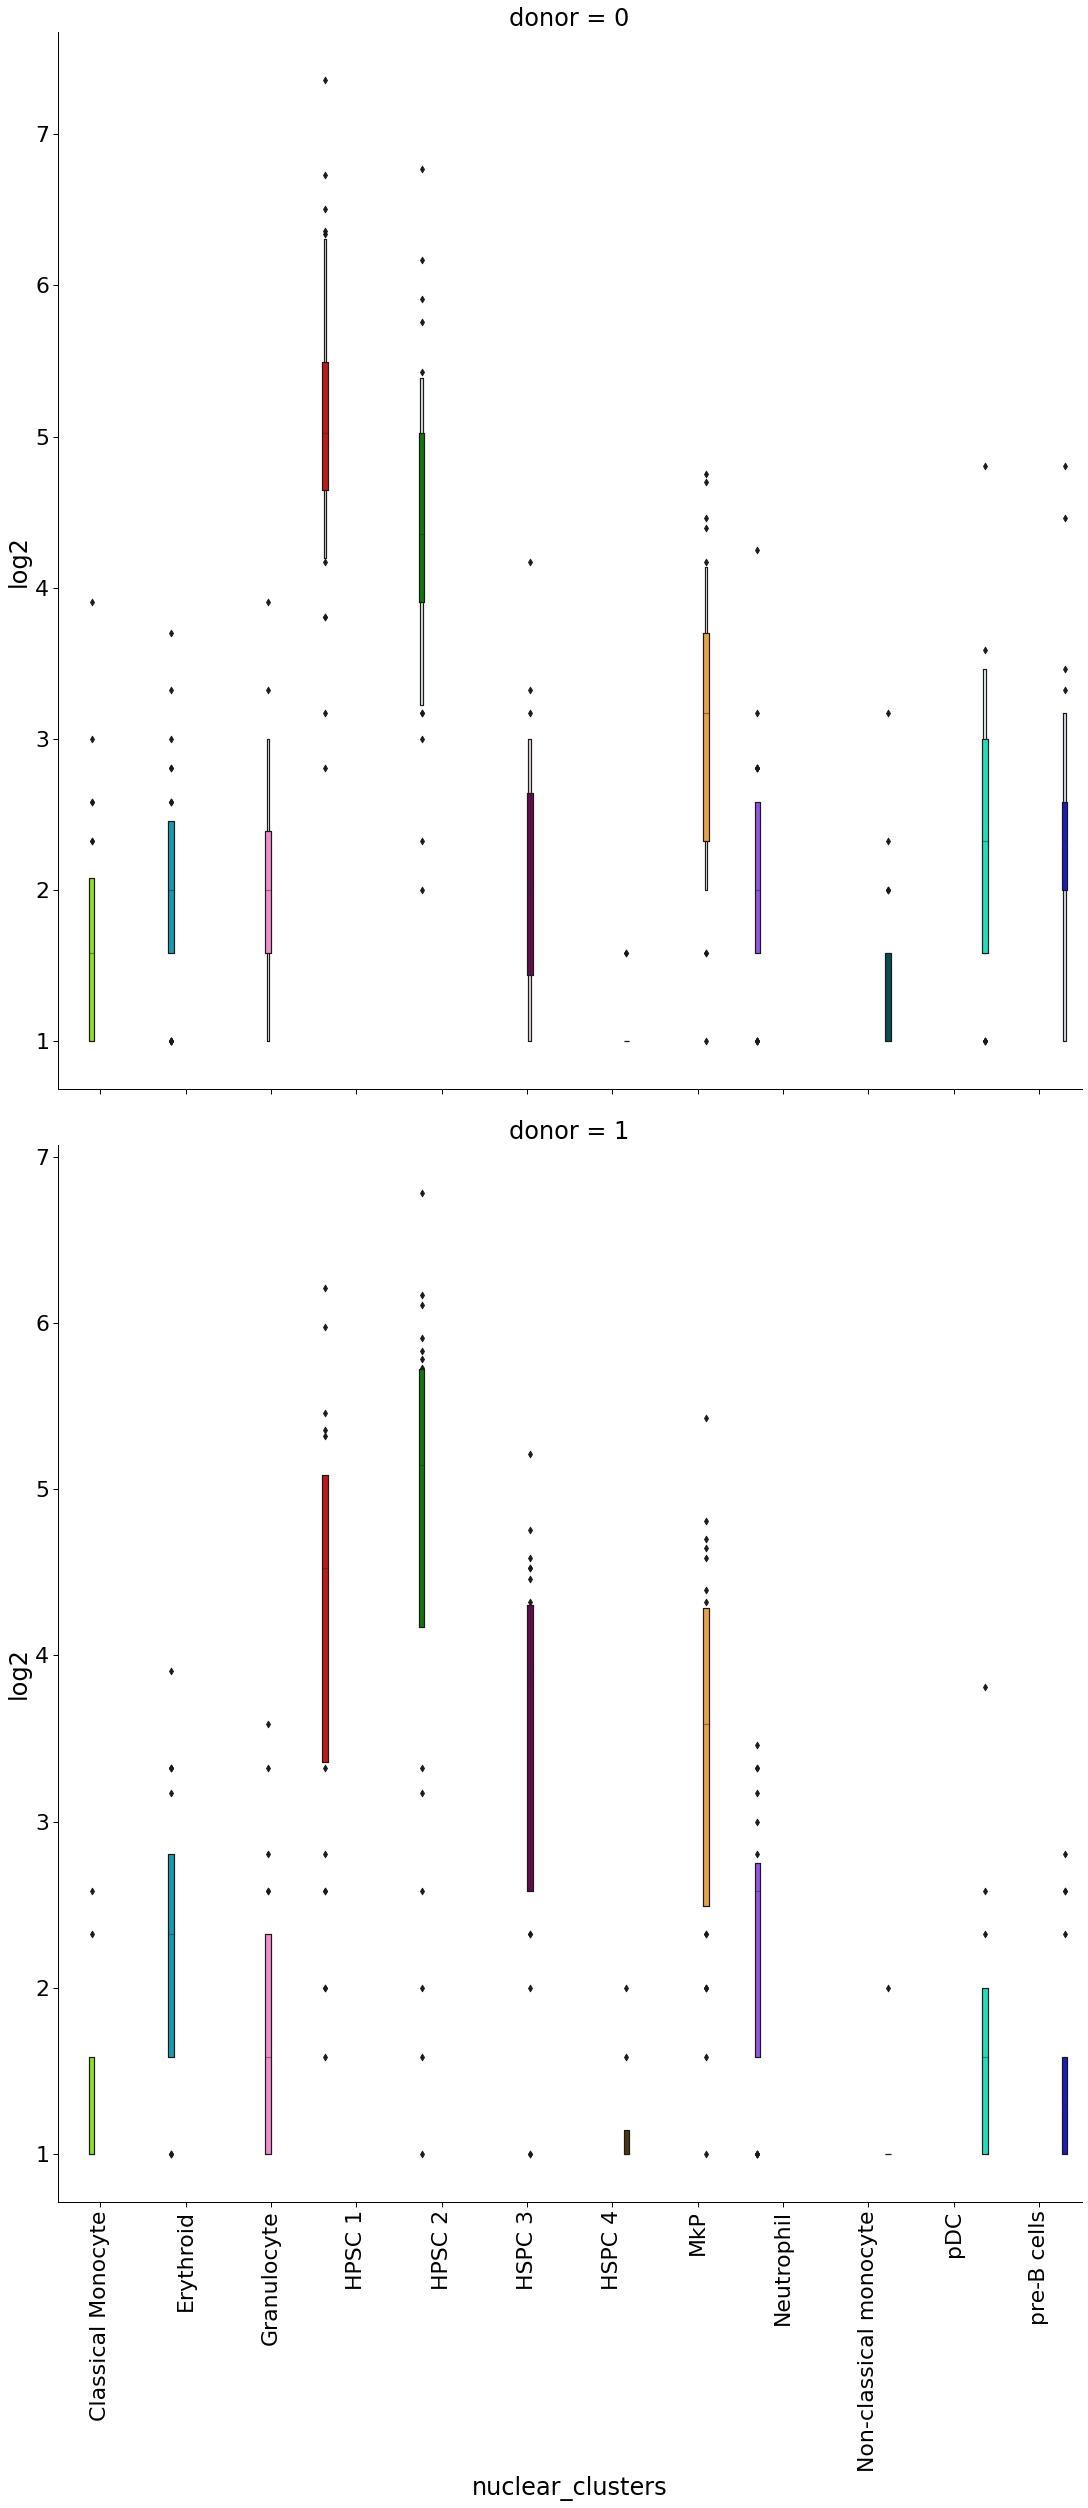

In [10]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order)
# sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
#             row="donor", kind="boxen", height=16, hue="nuclear_clusters", outlier_prop=0.001, showfliers=False,
#             palette=palette, hue_order=hue_order, dodge=True)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, "clone_cluster_boxen_diffY.pdf"))


clone_counts["log2"] = np.log2(1+clone_counts["ncells"]).fillna(0)
sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order)

plt.xticks(rotation=90)
plt.savefig(join(outdir, "log2_clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, "log2_clone_cluster_boxen_diffY.pdf"))




In [11]:
join(outdir, "log2_clone_cluster_boxen_diffY.svg")


'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/sepDonors/log2_clone_cluster_boxen_diffY.svg'

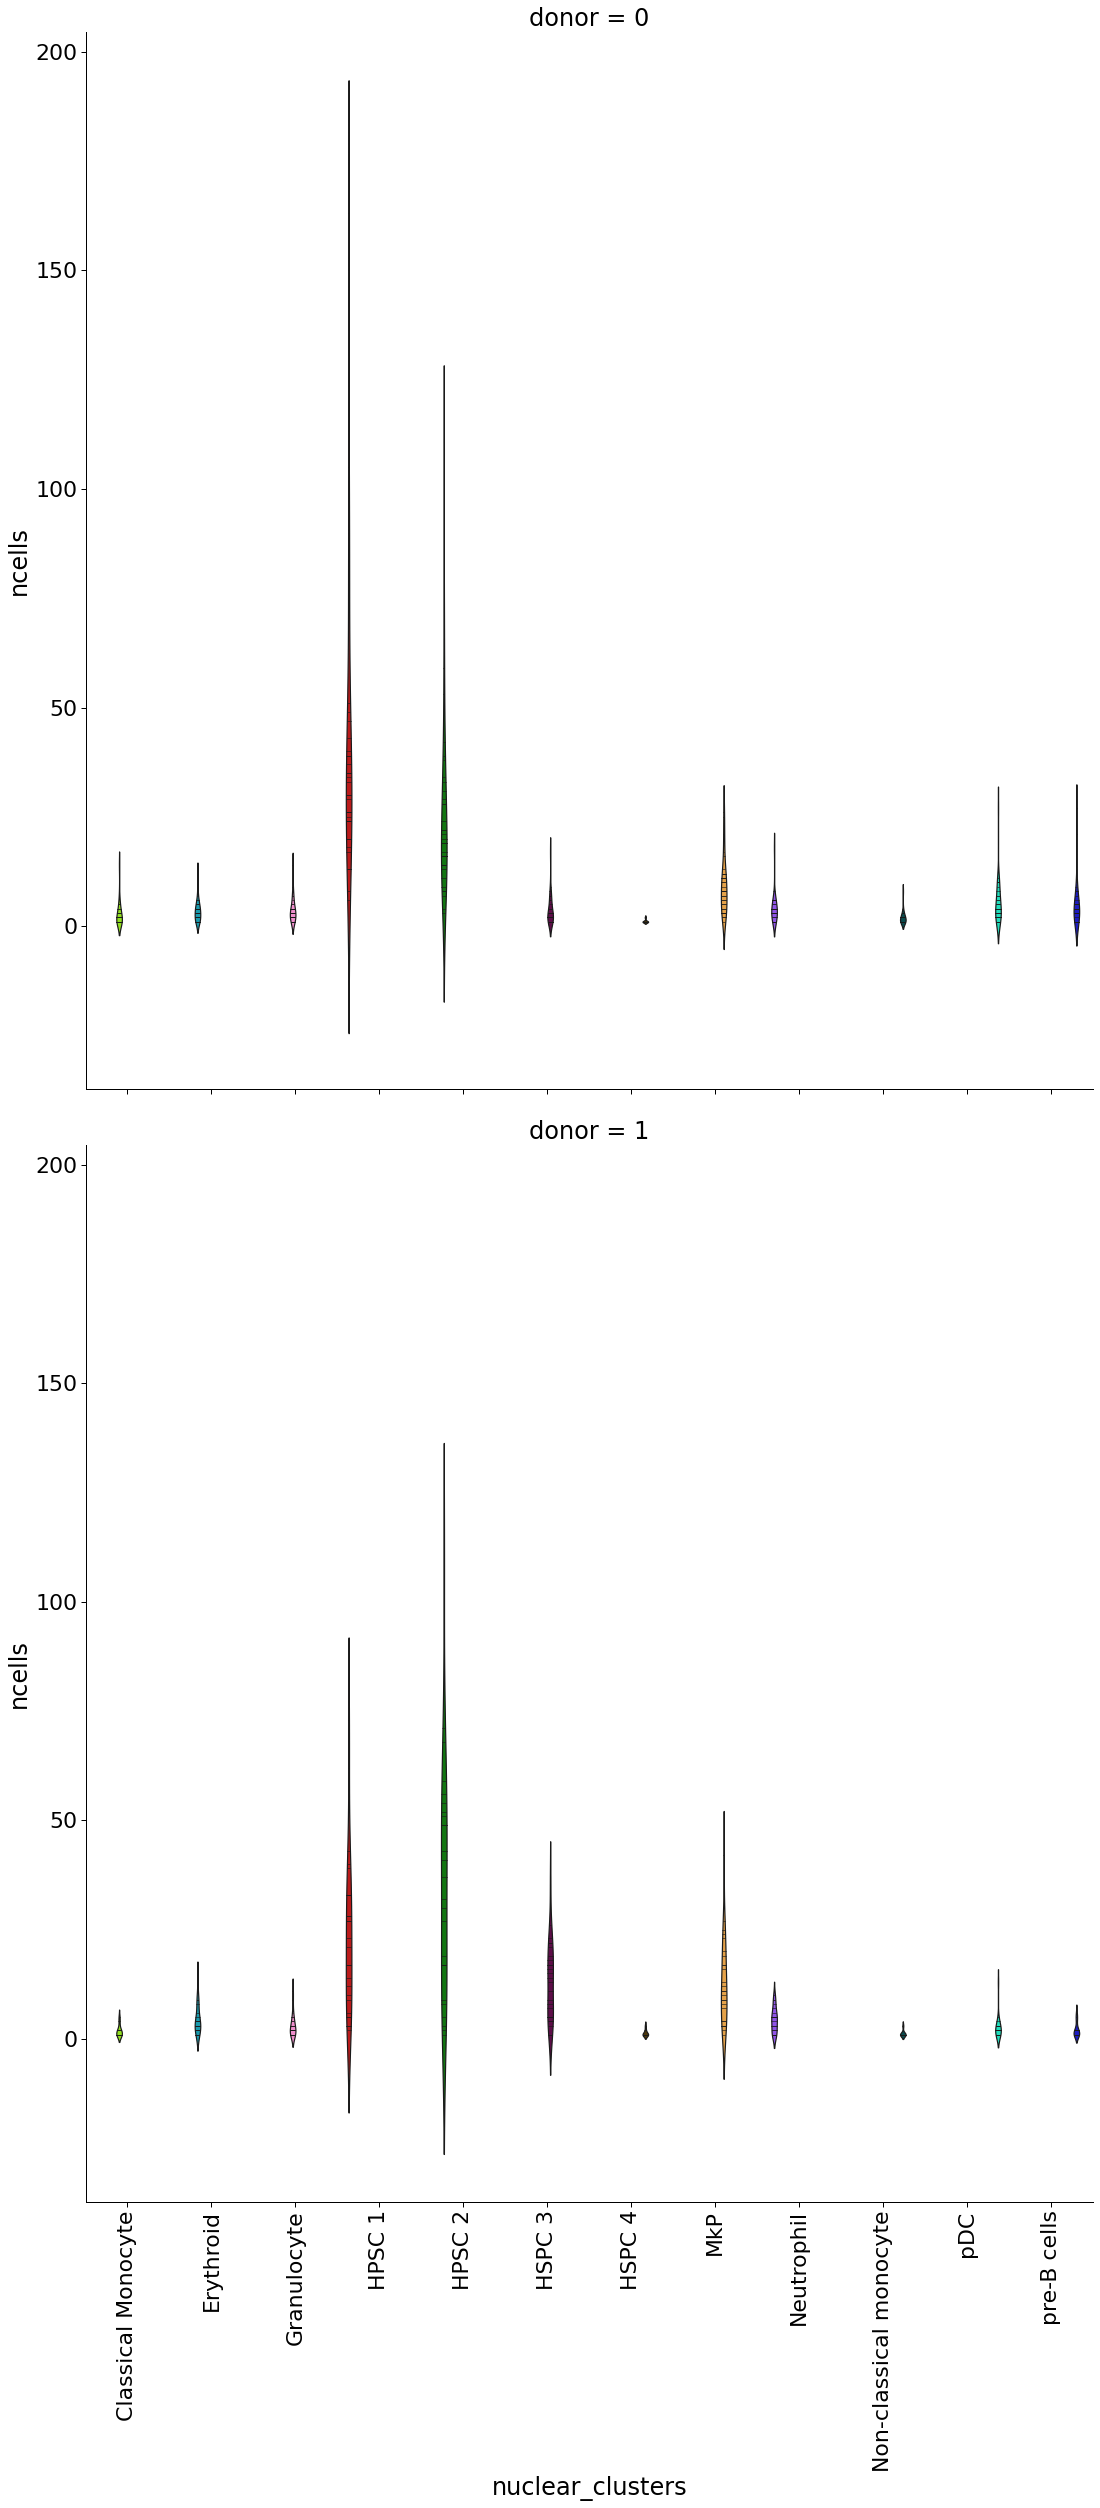

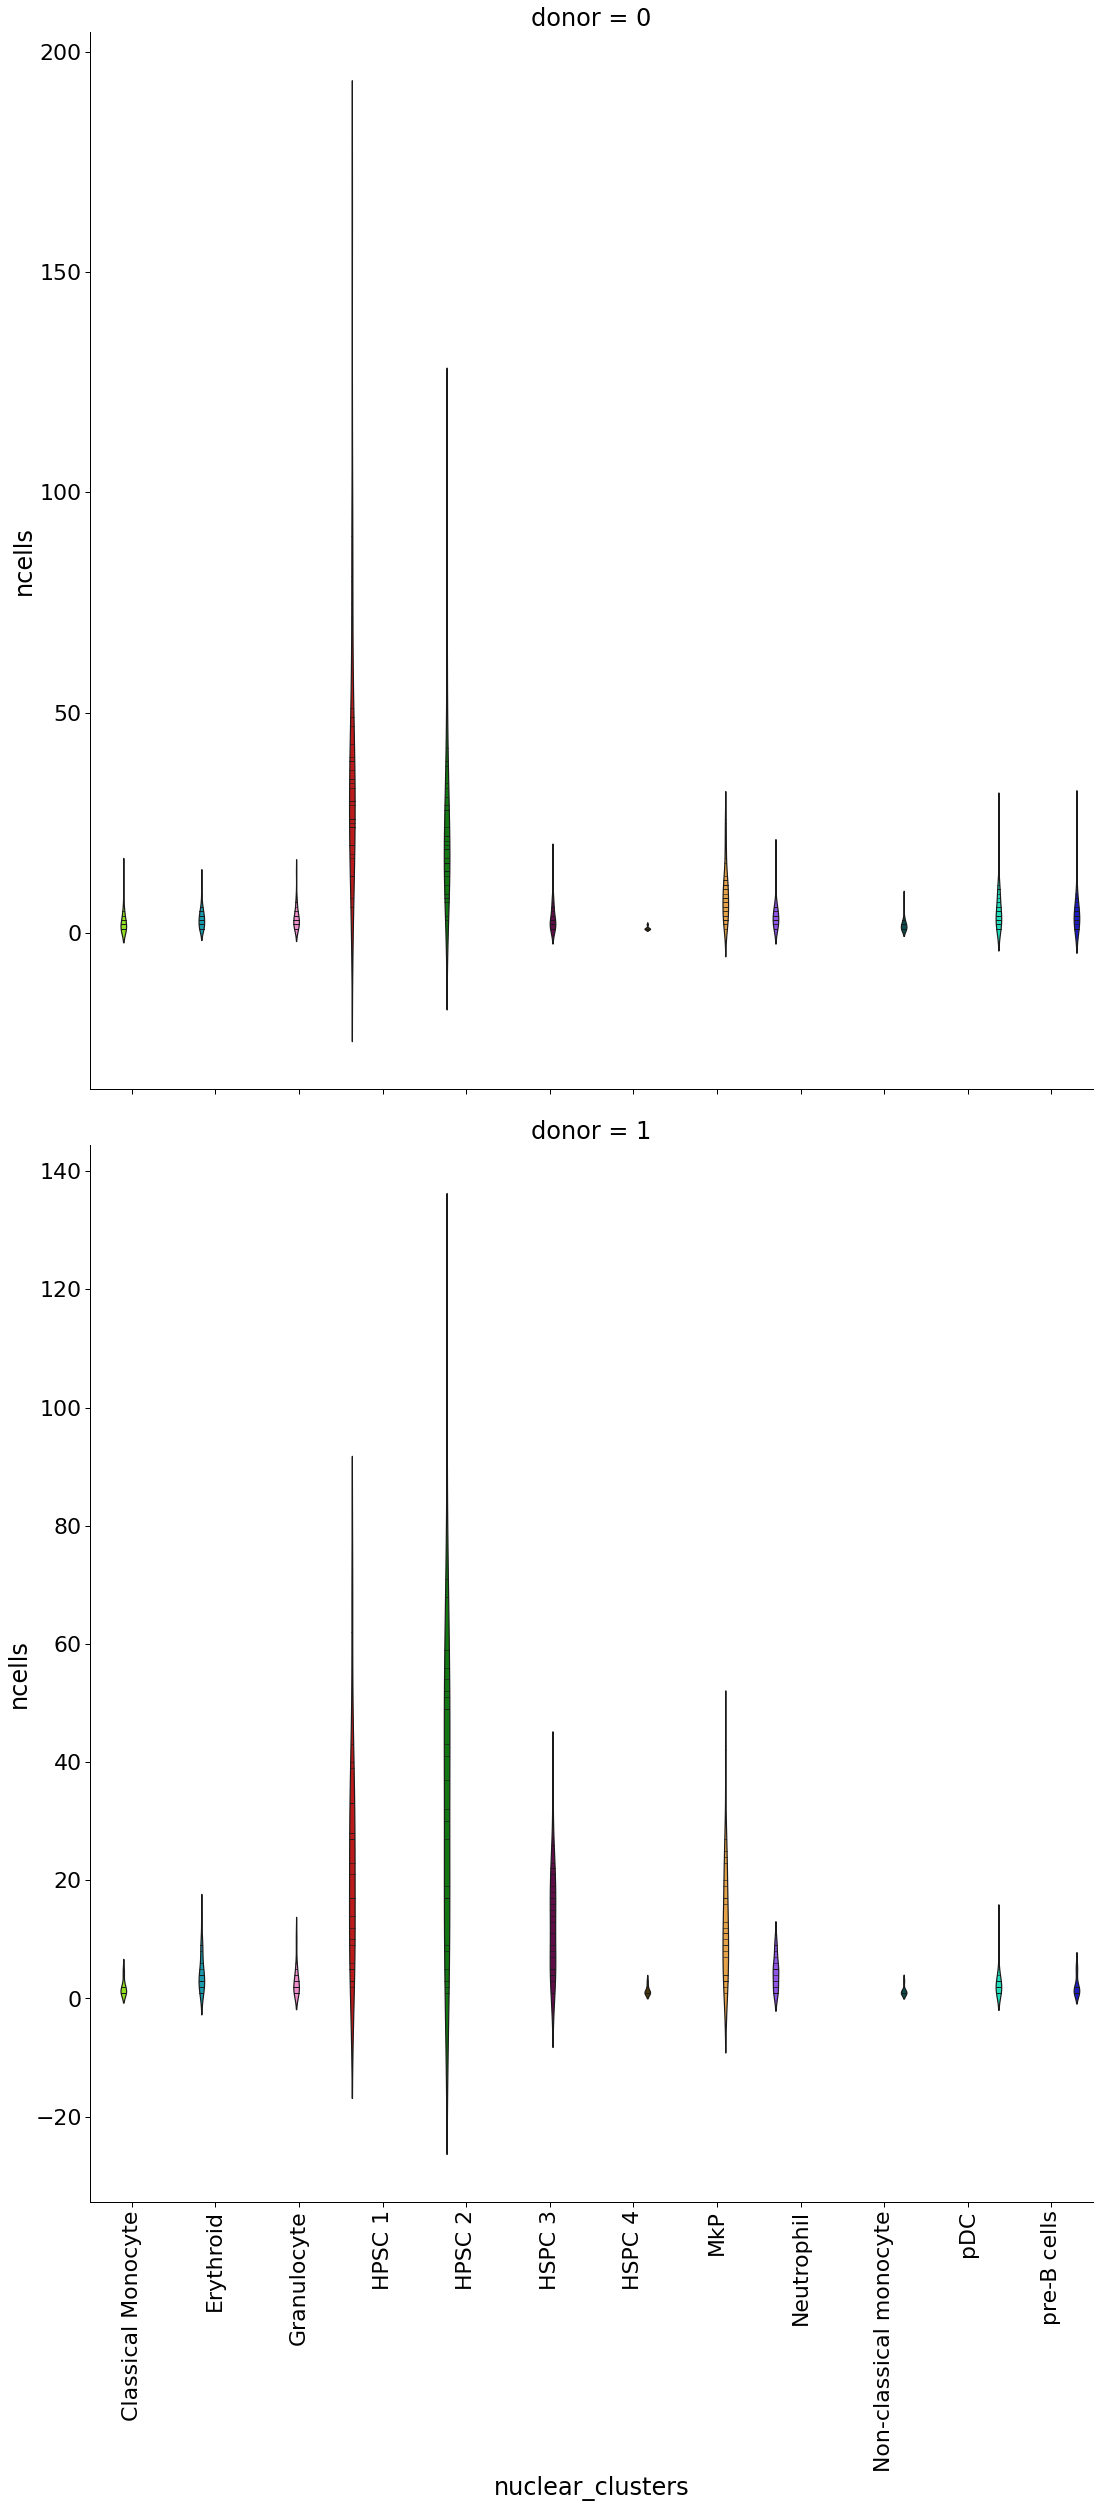

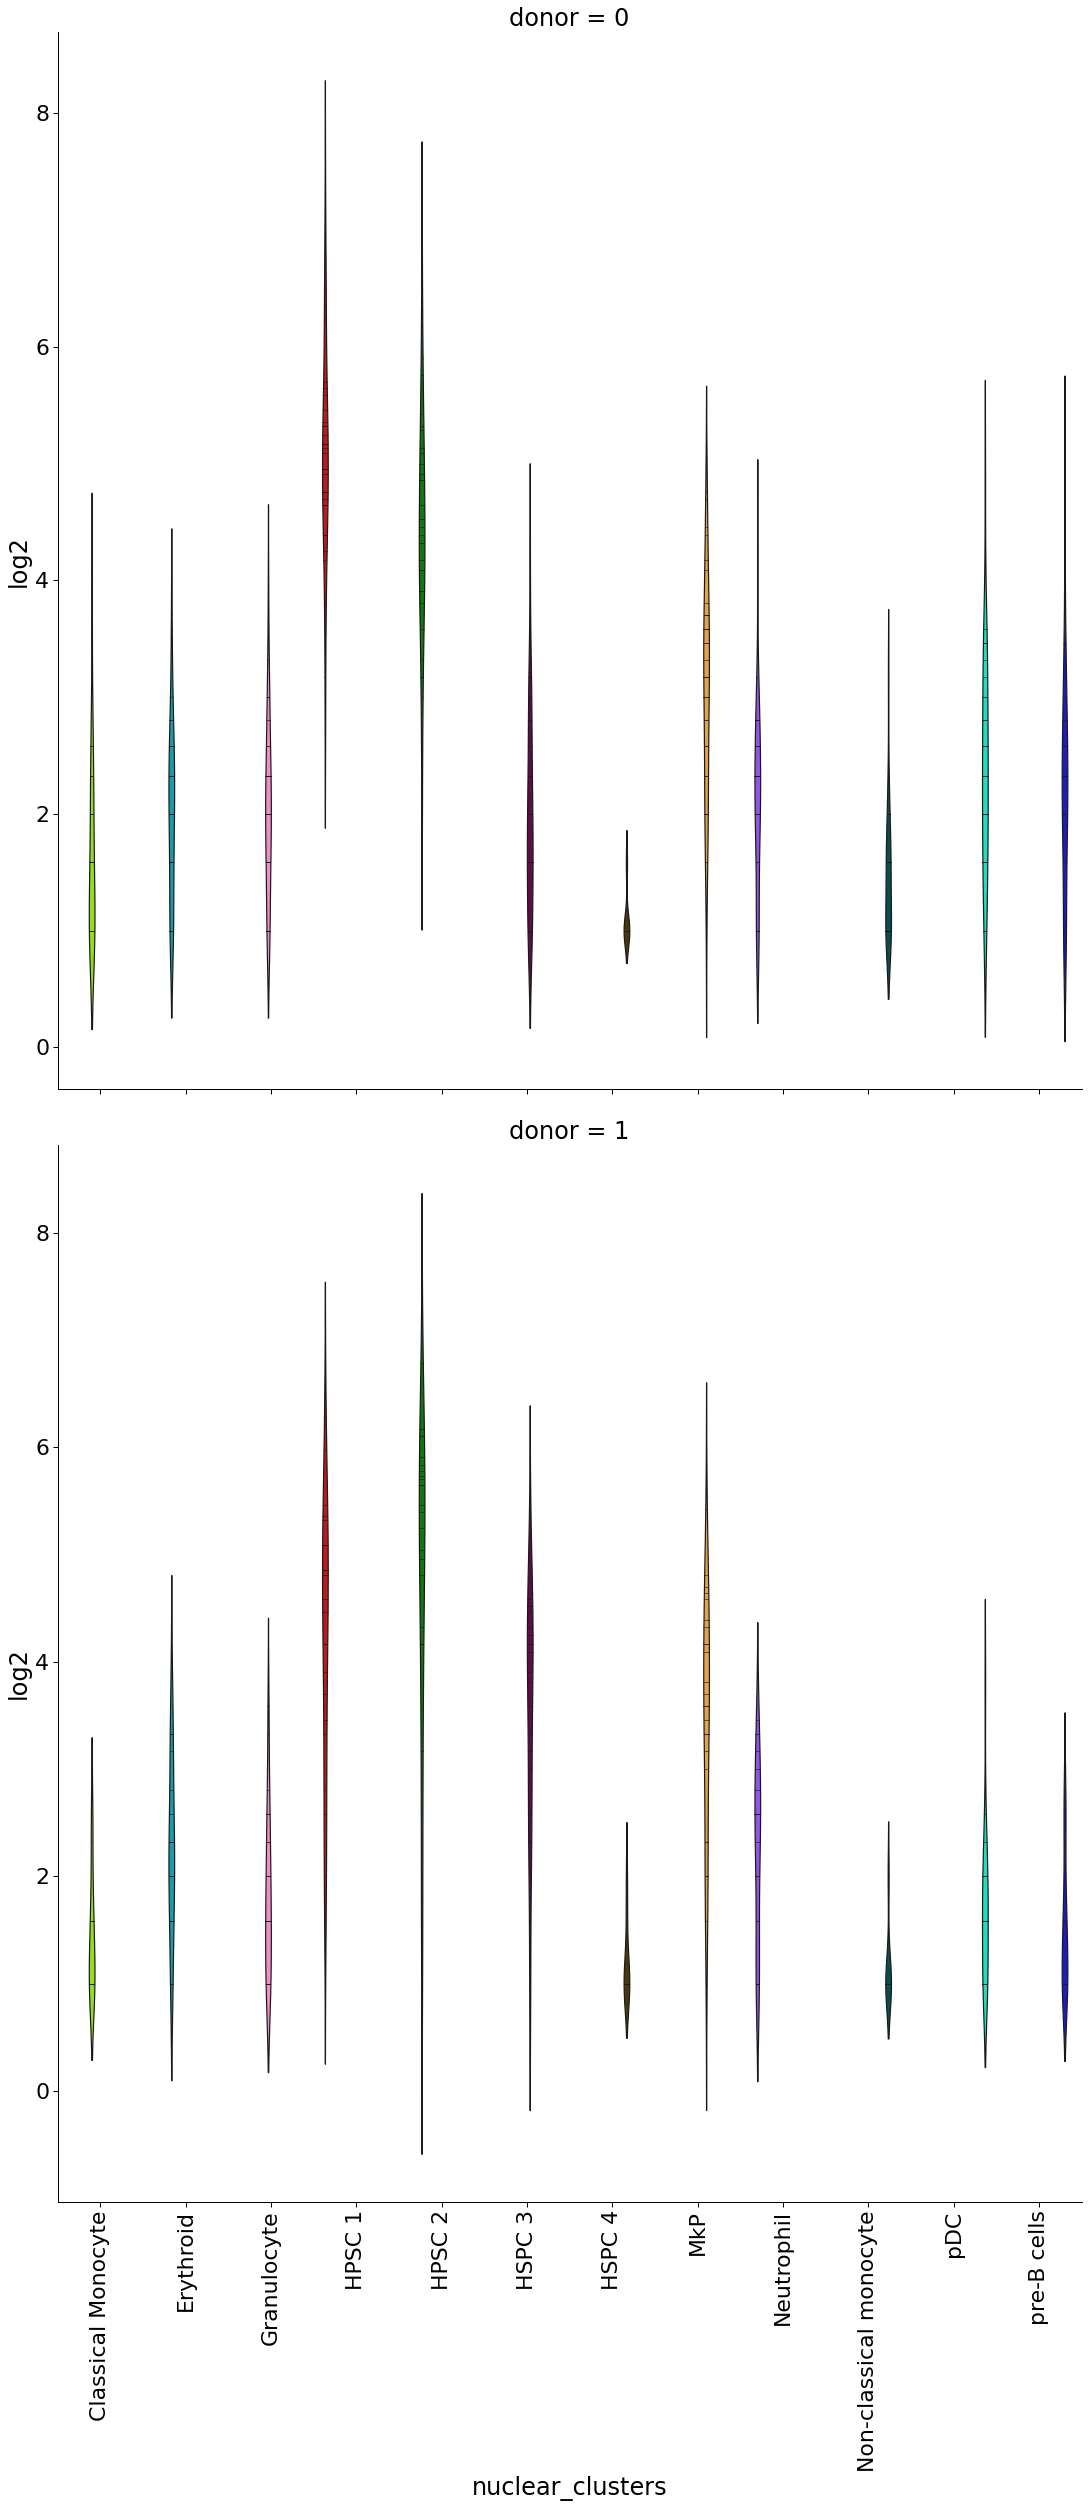

In [12]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick',
            hue="nuclear_clusters", palette=palette, hue_order=hue_order,
            row="donor", kind="violin", height=16)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_box.svg"))
plt.savefig(join(outdir, "clone_cluster_box.pdf"))


sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, "clone_cluster_box_diffY.pdf"))




sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "log2_clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, "log2_clone_cluster_box_diffY.pdf"))


## Plot counts for each donor

In [13]:
len(hue_order)

12

In [14]:
palette

[(0.8392156862745098, 0.0, 0.0),
 (0.5490196078431373, 0.23137254901960785, 1.0),
 (0.00392156862745098, 0.5294117647058824, 0.0),
 (0.0, 0.6745098039215687, 0.7764705882352941),
 (0.592156862745098, 1.0, 0.0),
 (1.0, 0.49411764705882355, 0.8196078431372549),
 (0.4196078431372549, 0.0, 0.30980392156862746),
 (1.0, 0.6470588235294118, 0.1843137254901961),
 (0.3411764705882353, 0.23137254901960785, 0.0),
 (0.0, 0.33725490196078434, 0.34901960784313724),
 (0.0, 0.0, 0.8666666666666667),
 (0.0, 0.9921568627450981, 0.8117647058823529)]

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


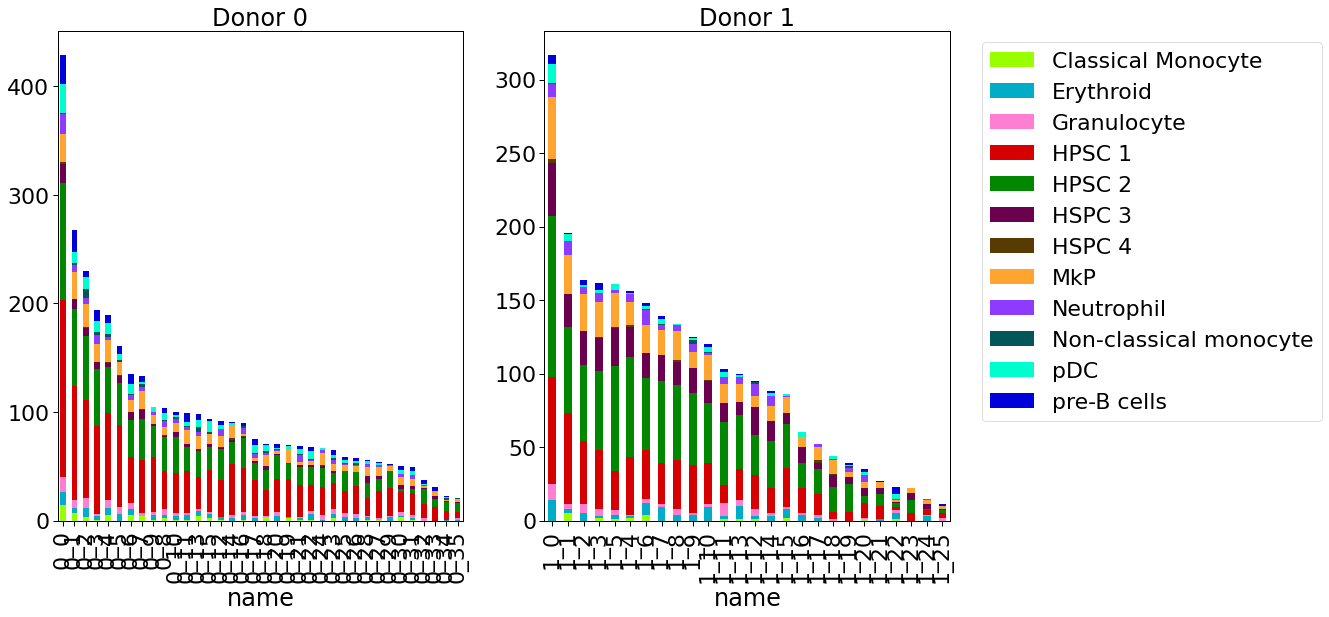

In [15]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

group_counts
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0)
f, ax = plt.subplots(figsize=(16,9))
tmp.loc[:, hue_order].plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_clones_barplot_clones.pdf"))

### Normalize to each donor
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0)
f, ax = plt.subplots(figsize=(16,9))
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.pdf"))

def donor_plots(df, name):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(16,9), ncols=len(donors), squeeze=False)
    count = 0
    for d, val in df.groupby("donor"):
        val.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax[0, count], color=color_d)
        ax[0, count].set_title(f"Donor {d}")
        count += 1
        
    if len(df["donor"].unique()) >1:
        ax[0,0].get_legend().remove()
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.savefig(join(outdir, name+".barplot.png"),bbox_to_anchor='tight')
    plt.savefig(join(outdir, name+".barplot.pdf"), dpi=300,bbox_to_anchor='tight')
    return

clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]


%matplotlib inline
donor_plots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

# Normalize per clone

In [16]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
0_0     429
0_1     268
0_10    100
0_11     99
0_12     92
       ... 
1_5     161
1_6     148
1_7     139
1_8     134
1_9     125
Name: ncells, Length: 62, dtype: int64

In [17]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters        donor
Classical Monocyte      0         0.551025
                        1         0.209455
Erythroid               0         1.111071
                        1         1.127234
Granulocyte             0         1.220343
                        1         0.887910
HPSC 1                  0        14.255911
                        1         5.943231
HPSC 2                  0         9.112125
                        1         8.515513
HSPC 3                  0         1.220892
                        1         3.502371
HSPC 4                  0         0.121020
                        1         0.105243
MkP                     0         3.435755
                        1         3.413130
Neutrophil              0         1.135731
                        1         1.018684
Non-classical monocyte  0         0.533893
                        1         0.085606
pDC                     0         1.709740
                        1         0.573931
pre

,donor,ncells,Classical Monocyte,Erythroid,Granulocyte,HPSC 1,HPSC 2,HSPC 3,HSPC 4,MkP,Neutrophil,Non-classical monocyte,pDC,pre-B cells
name,,,,,,,,,,,,,,
0_0,0,1.0,0.032634,0.027972,0.032634,0.379953,0.251748,0.039627,0.004662,0.060606,0.041958,0.002331,0.062937,0.062937
1_18,1,1.0,0.000000,0.000000,0.022727,0.113636,0.386364,0.181818,0.022727,0.204545,0.022727,0.000000,0.045455,0.000000
0_7,0,1.0,0.030075,0.000000,0.022556,0.368421,0.285714,0.060150,0.007519,0.120301,0.030075,0.022556,0.015038,0.037594
0_8,0,1.0,0.019231,0.028846,0.057692,0.336538,0.298077,0.009615,0.009615,0.067308,0.057692,0.009615,0.057692,0.048077
0_9,0,1.0,0.009524,0.038095,0.028571,0.485714,0.266667,0.019048,0.000000,0.076190,0.028571,0.000000,0.047619,0.000000


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


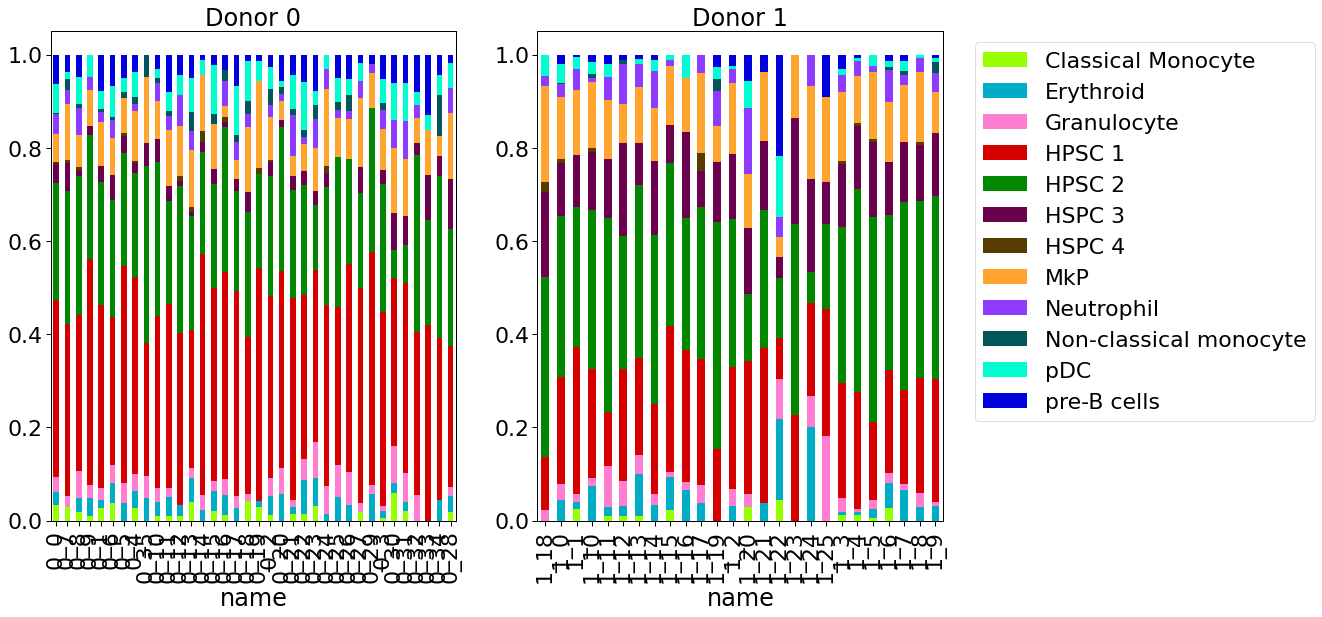

In [18]:
donor_plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [19]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

In [20]:
# from sklearn.datasets import make_blobs
# import colorcet as cc
# import matplotlib.pyplot as plt
# import seaborn as sns

#https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
#palette = sns.color_palette(cc.glasbey, n_colors=25)


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


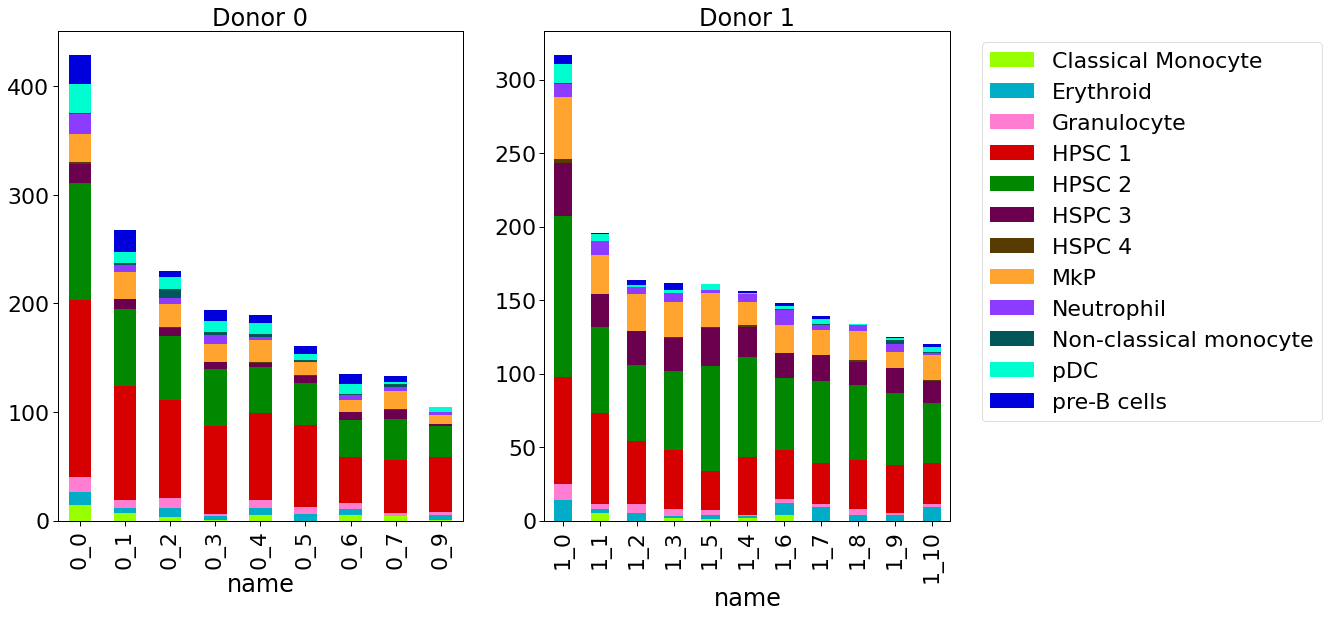

In [21]:
donor_plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_cluster_counts")

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


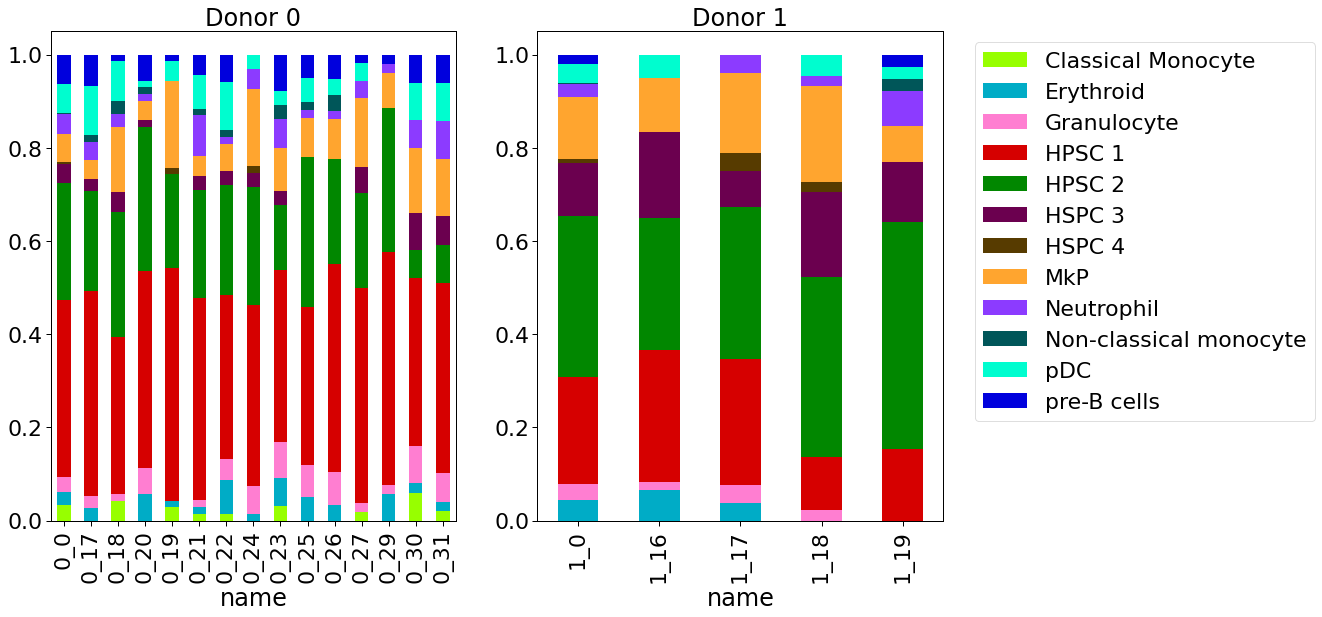

In [22]:
donor_plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")

---

## Group counts across donors and conditions and just conditions

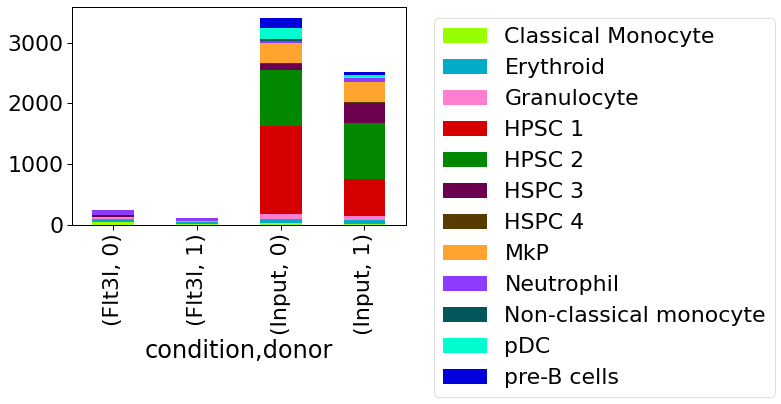

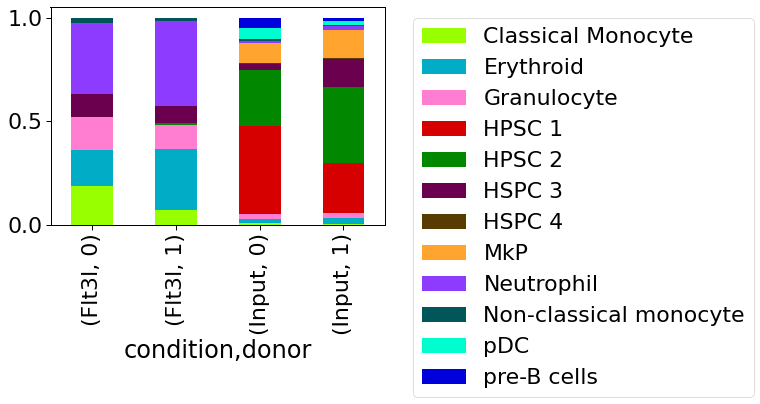

In [23]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor"], values=0).plot.bar(stacked=True,
                                                                                                              color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.pdf"))



### Normalize to each condition and donor
f, ax = plt.subplots()
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition","donor"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.pdf"))


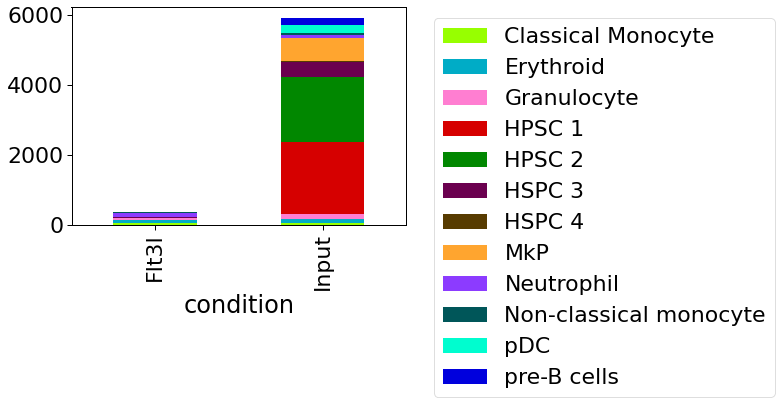

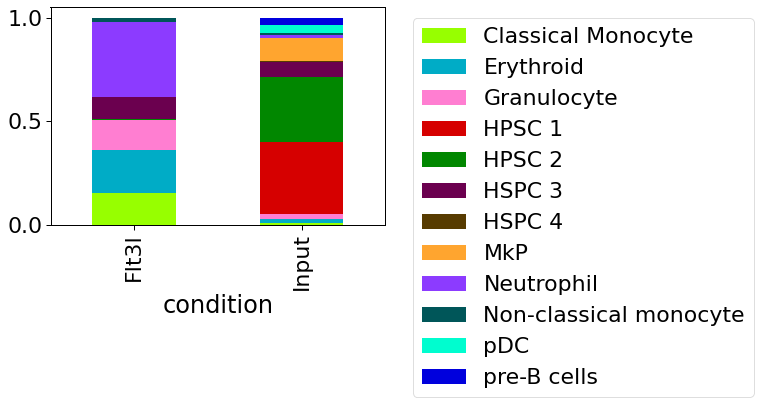

In [24]:
## Group counts across donors and conditions and just conditions
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition"], values=0).plot.bar(stacked=True, 
                                                                                                     color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "conditions_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, "conditions_clones_barplot_clones.pdf"), bbox_inches='tight')


f, ax = plt.subplots()
### Normalize to each condition and donor
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True,color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_conditions_clones_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, "norm_conditions_clones_barplot_clones.pdf"), bbox_inches='tight')



---

---

---

In [25]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/cluster_clone_counts/sepDonors'